In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, precision_score, classification_report
from keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.regularizers import l2

In [2]:
#reading data from my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls '/content/drive/MyDrive/Capstone/brain'

Testing  Training


In [4]:
train_folder = '/content/drive/MyDrive/Capstone/brain/Training'
test_folder = '/content/drive/MyDrive/Capstone/brain/Testing'

In [5]:
#function to read in the images and labels
def read_images(folder):
  images = []
  labels = []
  for tumor in os.listdir(folder): #gives a list of the files in this path - all the tumor folders
    tumor_path = os.path.join(folder, tumor) #gives us the path to each tumor folder
    if os.path.isdir(tumor_path): #if this is an existing path, then proceed
      for file in os.listdir(tumor_path): #list of the files in the tumor path - testing and training in each tumor file
        tumor_image_path = os.path.join(tumor_path, file) #getting the specific path to the images
        tumor_image = image.load_img(tumor_image_path, target_size=(224, 224)) #loading image and setting target size to reshape later
        images.append(image.img_to_array(tumor_image)) #adding all the images to the images list and converting the image to an array
        labels.append(tumor) #adding labels (names of tumors) to the labels list
  images = np.array(images)
  labels = np.array(labels)
  return images, labels

In [6]:
#training data
X_train, y_train = read_images(train_folder)
X_train, y_train = shuffle(X_train, y_train, random_state=42)

#testing data
X_test, y_test = read_images(test_folder)
X_test, y_test = shuffle(X_test, y_test, random_state=42)

y_train_encoded = pd.get_dummies(y_train)
y_test_encoded = pd.get_dummies(y_test)

In [7]:
X_train.shape, y_train_encoded.shape

((5714, 224, 224, 3), (5714, 4))

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
#testing model 3 using l2 regularizers
model3 = Sequential()

model3.add(Flatten(input_shape=(X_train.shape[1:])))
model3.add(Dense(59, activation='relu', kernel_regularizer=l2(0.002)))
model3.add(Dense(15, activation='relu', kernel_regularizer=l2(0.002)))
model3.add(Dense(4, activation='softmax', kernel_regularizer=l2(0.002)))

In [10]:
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [11]:
history3 = model3.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), batch_size=16, epochs=10)

Epoch 1/10
358/358 [==============================] - 10s 14ms/step - loss: 1.7179 - acc: 0.3862 - val_loss: 1.3582 - val_acc: 0.4638
Epoch 2/10
358/358 [==============================] - 3s 9ms/step - loss: 1.3015 - acc: 0.4398 - val_loss: 1.2542 - val_acc: 0.4943
Epoch 3/10
358/358 [==============================] - 3s 9ms/step - loss: 1.2800 - acc: 0.4611 - val_loss: 1.2422 - val_acc: 0.4790
Epoch 4/10
358/358 [==============================] - 3s 9ms/step - loss: 1.1744 - acc: 0.4613 - val_loss: 1.5584 - val_acc: 0.3402
Epoch 5/10
358/358 [==============================] - 3s 9ms/step - loss: 1.1602 - acc: 0.5592 - val_loss: 1.0663 - val_acc: 0.6834
Epoch 6/10
358/358 [==============================] - 3s 9ms/step - loss: 1.0268 - acc: 0.6481 - val_loss: 1.1140 - val_acc: 0.6438
Epoch 7/10
358/358 [==============================] - 3s 9ms/step - loss: 0.9709 - acc: 0.6610 - val_loss: 1.3368 - val_acc: 0.5408
Epoch 8/10
358/358 [==============================] - 3s 9ms/step - loss: 

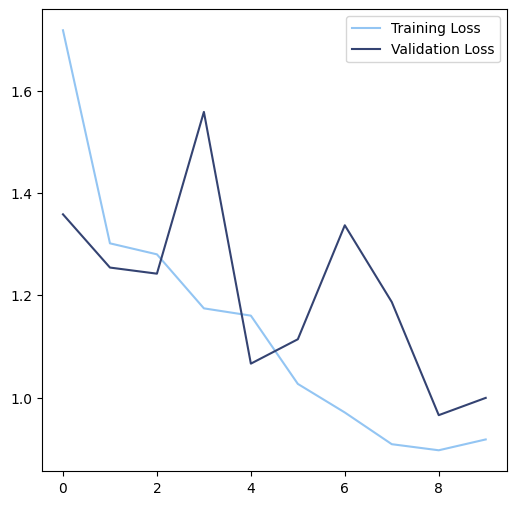

In [12]:
plt.figure(figsize=(6,6))
plt.plot(history3.history['loss'], c='#93C5F3', label='Training Loss')
plt.plot(history3.history['val_loss'], c='#344372', label='Validation Loss')
plt.legend();

In [13]:
model3.evaluate(X_test, y_test_encoded)

41/41 [==============================] - 0s 9ms/step - loss: 0.9994 - acc: 0.6621


[0.9994361400604248, 0.662090003490448]

In [14]:
y_pred3 = model3.predict(X_test)
#y_pred3

41/41 [==============================] - 0s 8ms/step


In [15]:
y_prediction3 = np.argmax(y_pred3, axis=1)
y_prediction3

array([2, 2, 3, ..., 3, 0, 2])

In [16]:
y_true3 = np.argmax(y_test_encoded.values, axis=1)
y_true3

array([2, 2, 0, ..., 2, 1, 2])

In [17]:
matrix3 = confusion_matrix(y_true3, y_prediction3)
matrix3

array([[222,  42,   0,  36],
       [107,  61,  24, 114],
       [  2,  34, 291,  78],
       [  6,   0,   0, 294]])

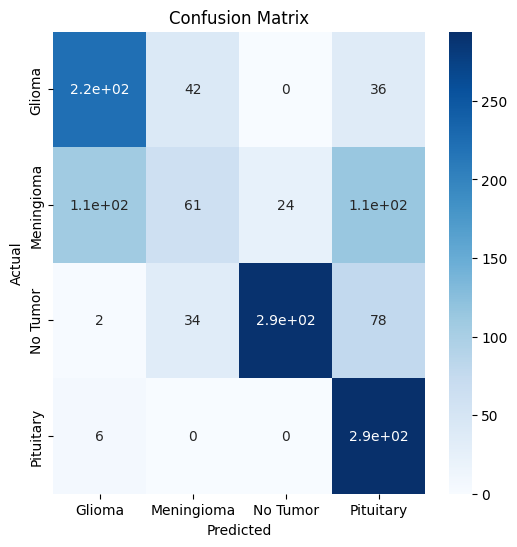

In [18]:
#plotting the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(matrix3, annot=True, cmap='Blues', xticklabels=['Glioma', 'Meningioma', 'No Tumor', 'Pituitary'], yticklabels=['Glioma', 'Meningioma', 'No Tumor', 'Pituitary'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [19]:
model3_precision = precision_score(y_true3, y_prediction3, average=None)
model3_precision

array([0.65875371, 0.44525547, 0.92380952, 0.56321839])

In [20]:
model3_accuracy = accuracy_score(y_true3, y_prediction3)
model3_accuracy

0.662090007627765

In [21]:
model3_recall = recall_score(y_true3, y_prediction3, average=None)
model3_recall

array([0.74      , 0.19934641, 0.71851852, 0.98      ])

In [22]:
model3_f1_score = f1_score(y_true3, y_prediction3, average=None)
model3_f1_score

array([0.69701727, 0.27539503, 0.80833333, 0.71532847])

In [23]:
#baseline scores
random_classifier = DummyClassifier(strategy="uniform")
random_classifier.fit(X_train, y_train_encoded)

DummyClassifier(strategy='uniform')

In [24]:
random_prediction = random_classifier.predict(X_test)

In [25]:
report = classification_report(y_test_encoded, random_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.23      0.49      0.31       300
           1       0.24      0.50      0.32       306
           2       0.30      0.49      0.37       405
           3       0.22      0.48      0.30       300

   micro avg       0.25      0.49      0.33      1311
   macro avg       0.25      0.49      0.33      1311
weighted avg       0.25      0.49      0.33      1311
 samples avg       0.23      0.49      0.30      1311



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
